In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sklearn
from collections import Counter
import glob
import pickle
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from mpl_toolkits.axes_grid1 import AxesGrid
from sklearn.metrics import confusion_matrix
from keras.optimizers import SGD, Adam
from random import shuffle
import os
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


In [2]:
a = 0
for dir_path in glob.glob("*.png"):
    if(dir_path == "694.png"):
        continue
    #print(dir_path)
    image = cv2.imread(dir_path)
    image = image[:,0:200]
    cv2.imwrite("0 to 30 seconds/" + dir_path,image)
    a = a + 1
print(a)

998


In [30]:
a = 0
for dir_path in glob.glob("*.png"):
    if(dir_path == "694.png"):
        continue
    print(dir_path)
    image1 = cv2.imread(dir_path)
    image1 = image1[:,200:400]
    cv2.imwrite("30 to 60 seconds/"+ dir_path,image1)
    a = a + 1
print(a)

1.png
10.png
100.png
1000.png
1001.png
101.png
102.png
103.png
104.png
105.png
106.png
107.png
108.png
109.png
11.png
110.png
111.png
112.png
113.png
114.png
115.png
116.png
117.png
118.png
119.png
12.png
120.png
121.png
122.png
123.png
124.png
125.png
126.png
127.png
128.png
129.png
13.png
130.png
131.png
132.png
133.png
134.png
135.png
136.png
137.png
138.png
139.png
14.png
140.png
141.png
142.png
143.png
144.png
145.png
146.png
147.png
148.png
149.png
15.png
150.png
151.png
152.png
153.png
154.png
155.png
156.png
157.png
158.png
159.png
16.png
160.png
161.png
162.png
163.png
164.png
165.png
166.png
167.png
168.png
169.png
17.png
170.png
171.png
172.png
173.png
174.png
175.png
176.png
177.png
178.png
179.png
18.png
180.png
181.png
182.png
183.png
184.png
185.png
186.png
187.png
188.png
189.png
19.png
190.png
191.png
192.png
193.png
194.png
195.png
196.png
197.png
198.png
199.png
2.png
20.png
200.png
201.png
202.png
203.png
204.png
205.png
206.png
207.png
208.png
209.png
21.png
210.pn

In [2]:
map_genre = {0:'Rock',
            1:'Pop',
            2:'Jazz'}
batch_size = 128
epochs = 50
num_classes = len(map_genre)



In [3]:
def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    return model, opt

In [4]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log0.csv', append = True, separator=';')
csv_logger1 = CSVLogger('log30.csv',append = True,separator=';')
csv_logger2 = CSVLogger('vgg16log0.csv',append = True, separator = ';')
csv_logger3 = CSVLogger('vgg16log30.csv',append=True, separator = ';')
csv_logger4 = CSVLogger('vgg19log0.csv',append = True,separator = ';')
csv_logger5 = CSVLogger('vgg19log30.csv',append=True,separator=';')
model, opt = create_model(input_shape=(90,50,3))

In [34]:
anotation = pd.read_csv('Anotasi.csv')
anotation.head()

,judul,artist,file_audio,file_lirik,file_poster,tahun,genre 1,Era
0,Hampa,Ari Lasso,1,1,1,2003,Rock,2000'
1,Rahasia Perempuan,Ari Lasso,2,2,2,2003,Rock,2000'
2,Aku dan Dirimu,Ari Lasso,3,3,3,2008,Rock,2000'
3,Seandainya,Ari Lasso,4,4,4,2006,Rock,2000'
4,Perbedaaan,Ari Lasso,5,5,5,2001,Rock,2000'


In [35]:
a = 0
for dir_path in glob.glob("0 to 30 seconds/*.png"):
    name = dir_path.split('\\')[1]
    temp = name.split('.')[0]
    genre = anotation["genre 1"][int(temp) - 1]
    if(genre == "Rock"):
        rock = cv2.imread(dir_path)
        cv2.imwrite('0 to 30 seconds/Rock/'+name,rock)
        #a = a + 1
    elif(genre == "Pop"):
        pop = cv2.imread(dir_path)
        cv2.imwrite('0 to 30 seconds/Pop/'+name,pop)
        
    elif(genre == "Jazz"):
        jazz = cv2.imread(dir_path)
        cv2.imwrite('0 to 30 seconds/Jazz/'+name,jazz)
        a = a + 1

b = 0
for dir_path in glob.glob("30 to 60 seconds/*.png"):
    name = dir_path.split('\\')[1]
    temp = name.split('.')[0]
    genre = anotation["genre 1"][int(temp) - 1]
    if(genre == "Rock"):
        rock = cv2.imread(dir_path)
        cv2.imwrite('30 to 60 seconds/Rock/'+name,rock)
        #b = b +1
    elif(genre == "Pop"):
        pop = cv2.imread(dir_path)
        cv2.imwrite('30 to 60 seconds/Pop/'+name,pop)
    elif(genre == "Jazz"):
        jazz = cv2.imread(dir_path)
        cv2.imwrite('30 to 60 seconds/Jazz/'+name,jazz)
        b = b + 1
        
print(a, b)

240 240


In [36]:
print(len(glob.glob("")))
print(len(glob.glob("0 to 30 seconds/*.png")))
print(len(glob.glob("30 to 60 seconds/*.png")))
print(len(glob.glob("0 to 30 seconds/Rock/Test/*.png"))+len(glob.glob("0 to 30 seconds/Rock/Train/*.png")))
print(len(glob.glob("30 to 60 seconds/Rock/*.png")))



0
998
998
0
0


In [37]:
i=0
for dir_path in glob.glob("0 to 30 seconds/Rock/*.png"):
    name = dir_path.split('\\')[1]
    if (i<191):
        train = cv2.imread(glob.glob("0 to 30 seconds/Rock/*.png")[i])
        cv2.imwrite("0 to 30 seconds/Rock/Train/"+name,train)
        i=i+1
    else:
        test = cv2.imread(glob.glob("0 to 30 seconds/Rock/*.png")[i])
        cv2.imwrite("0 to 30 seconds/Rock/Test/"+name,test)
        i=i+1
i=0
for dir_path in glob.glob("0 to 30 seconds/Pop/*.png"):
    name = dir_path.split('\\')[1]
    if (i<342):
        train = cv2.imread(glob.glob("0 to 30 seconds/Pop/*.png")[i])
        cv2.imwrite("0 to 30 seconds/Pop/Train/"+name,train)
        i=i+1
    else:
        test = cv2.imread(glob.glob("0 to 30 seconds/Pop/*.png")[i])
        cv2.imwrite("0 to 30 seconds/Pop/Test/"+name,test)
        i=i+1
i=0        
for dir_path in glob.glob("0 to 30 seconds/Jazz/*.png"):
    name = dir_path.split('\\')[1]
    if (i<168):
        train = cv2.imread(glob.glob("0 to 30 seconds/Jazz/*.png")[i])
        cv2.imwrite("0 to 30 seconds/Jazz/Train/"+name,train)
        i=i+1
    else:
        test = cv2.imread(glob.glob("0 to 30 seconds/Jazz/*.png")[i])
        cv2.imwrite("0 to 30 seconds/Jazz/Test/"+name,test)
        i=i+1
print(i)

0


In [38]:
i=0
for dir_path in glob.glob("30 to 60 seconds/Rock/*.png"):
    name = dir_path.split('\\')[1]
    if (i<191):
        train = cv2.imread(glob.glob("30 to 60 seconds/Rock/*.png")[i])
        cv2.imwrite("30 to 60 seconds/Rock/Train/"+name,train)
        i=i+1
    else:
        test = cv2.imread(glob.glob("30 to 60 seconds/Rock/*.png")[i])
        cv2.imwrite("30 to 60 seconds/Rock/Test/"+name,test)
        i=i+1
i=0
for dir_path in glob.glob("30 to 60 seconds/Pop/*.png"):
    name = dir_path.split('\\')[1]
    if (i<342):
        train = cv2.imread(glob.glob("30 to 60 seconds/Pop/*.png")[i])
        cv2.imwrite("30 to 60 seconds/Pop/Train/"+name,train)
        i=i+1
    else:
        test = cv2.imread(glob.glob("30 to 60 seconds/Pop/*.png")[i])
        cv2.imwrite("30 to 60 seconds/Pop/Test/"+name,test)
        i=i+1
i=0        
for dir_path in glob.glob("30 to 60 seconds/Jazz/*.png"):
    name = dir_path.split('\\')[1]
    if (i<168):
        train = cv2.imread(glob.glob("30 to 60 seconds/Jazz/*.png")[i])
        cv2.imwrite("30 to 60 seconds/Jazz/Train/"+name,train)
        i=i+1
    else:
        test = cv2.imread(glob.glob("30 to 60 seconds/Jazz/*.png")[i])
        cv2.imwrite("30 to 60 seconds/Jazz/Test/"+name,test)
        i=i+1
print(i)

0


<h1>AlexNet</h1>

In [7]:
pics, labels = [], []
i=0
for dir_path in glob.glob("0 to 30 seconds/Train/*"):
    for pic in glob.glob(os.path.join(dir_path,"*.png")):
        temp = cv2.imread(pic)
        temp = temp/255
        temp = cv2.resize(temp, (50, 90)) 
        pics.append(temp)
        labels.append(i)
    i=i+1 
x_train = np.array(pics)
y_train = np.array(labels)
y_train = keras.utils.to_categorical(y_train,num_classes)

In [8]:
pics , labels = [],[]
i=0
for dir_path in glob.glob("0 to 30 seconds/Test/*"):
    for pic in glob.glob(os.path.join(dir_path,"*.png")):
        temp = cv2.imread(pic)
        temp = temp/255
        temp = cv2.resize(temp, (50, 90)) 
        pics.append(temp)
        labels.append(i)
    i=i+1
x_test = np.array(pics)
y_test = np.array(labels)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [10]:
models, opt = create_model(input_shape=(90,50,3))
models.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])
models.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test),callbacks = [csv_logger])

Train on 701 samples, validate on 297 samples
Epoch 1/50
701/701 [==============================] - 2s 2ms/step - loss: 1.0926 - acc: 0.4023 - val_loss: 1.0583 - val_acc: 0.4882
Epoch 2/50
701/701 [==============================] - 1s 1ms/step - loss: 1.0464 - acc: 0.4879 - val_loss: 1.0512 - val_acc: 0.4882
Epoch 3/50
701/701 [==============================] - 1s 1ms/step - loss: 1.0454 - acc: 0.4879 - val_loss: 1.0548 - val_acc: 0.4882
Epoch 4/50
701/701 [==============================] - 1s 1ms/step - loss: 1.0480 - acc: 0.4879 - val_loss: 1.0541 - val_acc: 0.4882
Epoch 5/50
701/701 [==============================] - 1s 1ms/step - loss: 1.0440 - acc: 0.4879 - val_loss: 1.0461 - val_acc: 0.4882
Epoch 6/50
701/701 [==============================] - 1s 1ms/step - loss: 1.0410 - acc: 0.4879 - val_loss: 1.0459 - val_acc: 0.4882
Epoch 7/50
701/701 [==============================] - 1s 1ms/step - loss: 1.0401 - acc: 0.4879 - val_loss: 1.0444 - val_acc: 0.4882
Epoch 8/50
701/701 [==========

In [11]:
models.save('result0.h5')
models.save_weights('my_spectogram_0_weights.h5')

In [12]:
y_pred = models.predict(x_test)

In [13]:
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_genre.values())), sep='')


             precision    recall  f1-score   support

       Rock       0.00      0.00      0.00        72
        Pop       0.52      0.83      0.64       145
       Jazz       0.52      0.41      0.46        80

avg / total       0.39      0.52      0.44       297



c:\users\gibra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


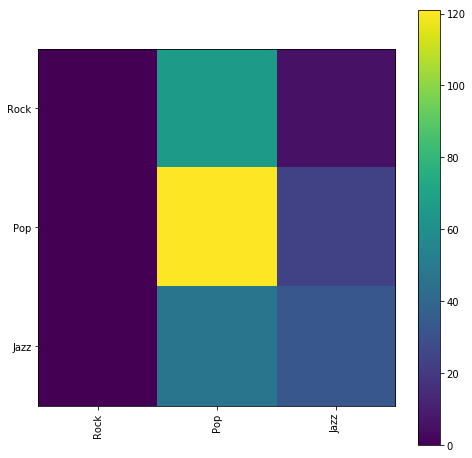

In [14]:
plt.figure(figsize=(8,8))
cnf_matrix = sklearn.metrics.confusion_matrix(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1))
classes = list(map_genre.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [15]:
pics, labels = [], []
i=0
for dir_path in glob.glob("30 to 60 seconds/Train/*"):
    for pic in glob.glob(os.path.join(dir_path,"*.png")):
        temp = cv2.imread(pic)
        temp = temp/255
        temp = cv2.resize(temp, (50, 90)) 
        pics.append(temp)
        labels.append(i)
    i=i+1 
x_train = np.array(pics)
y_train = np.array(labels)
y_train = keras.utils.to_categorical(y_train,num_classes)

In [16]:
pics , labels = [],[]
i=0
for dir_path in glob.glob("30 to 60 seconds/Test/*"):
    for pic in glob.glob(os.path.join(dir_path,"*.png")):
        temp = cv2.imread(pic)
        temp = temp/255
        temp = cv2.resize(temp, (50, 90)) 
        pics.append(temp)
        labels.append(i)
    i=i+1
x_test = np.array(pics)
y_test = np.array(labels)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [18]:
models, opt = create_model(input_shape=(90,50,3))
models.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])
models.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test),callbacks = [csv_logger1])

Train on 701 samples, validate on 297 samples
Epoch 1/50
701/701 [==============================] - 2s 2ms/step - loss: 1.0881 - acc: 0.4108 - val_loss: 1.0585 - val_acc: 0.4882
Epoch 2/50
701/701 [==============================] - 1s 1ms/step - loss: 1.0489 - acc: 0.4879 - val_loss: 1.0472 - val_acc: 0.4882
Epoch 3/50
701/701 [==============================] - 1s 1ms/step - loss: 1.0479 - acc: 0.4879 - val_loss: 1.0519 - val_acc: 0.4882
Epoch 4/50
701/701 [==============================] - 1s 1ms/step - loss: 1.0461 - acc: 0.4879 - val_loss: 1.0514 - val_acc: 0.4882
Epoch 5/50
701/701 [==============================] - 1s 1ms/step - loss: 1.0438 - acc: 0.4879 - val_loss: 1.0454 - val_acc: 0.4882
Epoch 6/50
701/701 [==============================] - 1s 1ms/step - loss: 1.0445 - acc: 0.4879 - val_loss: 1.0454 - val_acc: 0.4882
Epoch 7/50
701/701 [==============================] - 1s 1ms/step - loss: 1.0376 - acc: 0.4879 - val_loss: 1.0466 - val_acc: 0.4882
Epoch 8/50
701/701 [==========

In [19]:
models.save('result30.h5')
models.save_weights('my_spectogram_30_weights.h5')

In [20]:
y_pred = models.predict(x_test)

In [21]:
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_genre.values())), sep='')


             precision    recall  f1-score   support

       Rock       0.00      0.00      0.00        72
        Pop       0.52      0.76      0.62       145
       Jazz       0.49      0.54      0.51        80

avg / total       0.39      0.52      0.44       297



c:\users\gibra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


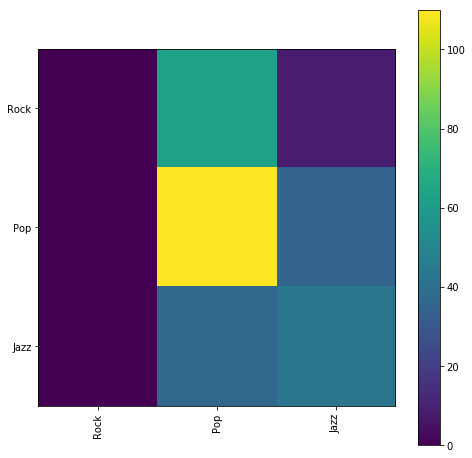

In [22]:
plt.figure(figsize=(8,8))
cnf_matrix = sklearn.metrics.confusion_matrix(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1))
classes = list(map_genre.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

<h1>VGGNET16</h1>

In [23]:
vgg16 = keras.applications.vgg16.VGG16(include_top=True, weights = None, input_tensor=None, input_shape=(90,50,3), pooling="max", classes=3)

In [24]:
pics, labels = [], []
i=0
for dir_path in glob.glob("0 to 30 seconds/Train/*"):
    for pic in glob.glob(os.path.join(dir_path,"*.png")):
        temp = cv2.imread(pic)
        temp = temp/255
        temp = cv2.resize(temp, (50, 90)) 
        pics.append(temp)
        labels.append(i)
    i=i+1 
x_train = np.array(pics)
y_train = np.array(labels)
y_train = keras.utils.to_categorical(y_train,num_classes)

In [25]:
pics , labels = [],[]
i=0
for dir_path in glob.glob("0 to 30 seconds/Test/*"):
    for pic in glob.glob(os.path.join(dir_path,"*.png")):
        temp = cv2.imread(pic)
        temp = temp/255
        temp = cv2.resize(temp, (50, 90)) 
        pics.append(temp)
        labels.append(i)
    i=i+1
x_test = np.array(pics)
y_test = np.array(labels)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [26]:
vgg16.compile(loss='categorical_crossentropy',
              optimizer=opt,
            metrics=['accuracy'])
vgg16.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test),callbacks = [csv_logger2])

Train on 701 samples, validate on 297 samples
Epoch 1/50
701/701 [==============================] - 10s 14ms/step - loss: 1.0937 - acc: 0.4422 - val_loss: 1.0835 - val_acc: 0.4882
Epoch 2/50
701/701 [==============================] - 3s 4ms/step - loss: 1.0756 - acc: 0.4879 - val_loss: 1.0642 - val_acc: 0.4882
Epoch 3/50
701/701 [==============================] - 3s 4ms/step - loss: 1.0588 - acc: 0.4879 - val_loss: 1.0518 - val_acc: 0.4882
Epoch 4/50
701/701 [==============================] - 3s 4ms/step - loss: 1.0499 - acc: 0.4879 - val_loss: 1.0474 - val_acc: 0.4882
Epoch 5/50
701/701 [==============================] - 3s 4ms/step - loss: 1.0480 - acc: 0.4879 - val_loss: 1.0469 - val_acc: 0.4882
Epoch 6/50
701/701 [==============================] - 3s 4ms/step - loss: 1.0470 - acc: 0.4879 - val_loss: 1.0470 - val_acc: 0.4882
Epoch 7/50
701/701 [==============================] - 3s 4ms/step - loss: 1.0470 - acc: 0.4879 - val_loss: 1.0469 - val_acc: 0.4882
Epoch 8/50
701/701 [========

In [27]:
vgg16.save('vgg16result0.h5')
vgg16.save_weights('vgg16_spectogram_0_weights.h5')

In [28]:
y_pred = vgg16.predict(x_test)

In [29]:
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_genre.values())), sep='')


             precision    recall  f1-score   support

       Rock       0.00      0.00      0.00        72
        Pop       0.49      1.00      0.66       145
       Jazz       0.00      0.00      0.00        80

avg / total       0.24      0.49      0.32       297



c:\users\gibra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


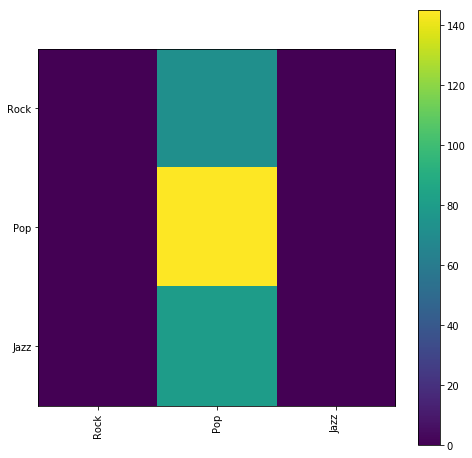

In [30]:
plt.figure(figsize=(8,8))
cnf_matrix = sklearn.metrics.confusion_matrix(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1))
classes = list(map_genre.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [31]:
pics, labels = [], []
i=0
for dir_path in glob.glob("30 to 60 seconds/Train/*"):
    for pic in glob.glob(os.path.join(dir_path,"*.png")):
        temp = cv2.imread(pic)
        temp = temp/255
        temp = cv2.resize(temp, (50, 90)) 
        pics.append(temp)
        labels.append(i)
    i=i+1 
x_train = np.array(pics)
y_train = np.array(labels)
y_train = keras.utils.to_categorical(y_train,num_classes)

In [32]:
pics , labels = [],[]
i=0
for dir_path in glob.glob("30 to 60 seconds/Test/*"):
    for pic in glob.glob(os.path.join(dir_path,"*.png")):
        temp = cv2.imread(pic)
        temp = temp/255
        temp = cv2.resize(temp, (50, 90)) 
        pics.append(temp)
        labels.append(i)
    i=i+1
x_test = np.array(pics)
y_test = np.array(labels)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [34]:
vgg16.compile(loss='categorical_crossentropy',
              optimizer=opt,
            metrics=['accuracy'])
vgg16.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test),callbacks = [csv_logger3])

Train on 701 samples, validate on 297 samples
Epoch 1/50
701/701 [==============================] - 4s 6ms/step - loss: 1.0376 - acc: 0.4879 - val_loss: 1.0371 - val_acc: 0.4882
Epoch 2/50
701/701 [==============================] - 3s 4ms/step - loss: 1.0365 - acc: 0.4879 - val_loss: 1.0367 - val_acc: 0.4882
Epoch 3/50
701/701 [==============================] - 3s 4ms/step - loss: 1.0337 - acc: 0.4879 - val_loss: 1.0324 - val_acc: 0.4882
Epoch 4/50
701/701 [==============================] - 3s 4ms/step - loss: 1.0300 - acc: 0.4879 - val_loss: 1.0287 - val_acc: 0.4882
Epoch 5/50
701/701 [==============================] - 3s 4ms/step - loss: 1.0254 - acc: 0.4879 - val_loss: 1.0223 - val_acc: 0.4882
Epoch 6/50
701/701 [==============================] - 3s 4ms/step - loss: 1.0171 - acc: 0.4879 - val_loss: 1.0160 - val_acc: 0.4882
Epoch 7/50
701/701 [==============================] - 3s 4ms/step - loss: 1.0131 - acc: 0.4850 - val_loss: 1.0385 - val_acc: 0.5185
Epoch 8/50
701/701 [==========

In [35]:
vgg16.save('vgg16result30.h5')
vgg16.save_weights('vgg16_spectogram_30_weights.h5')

In [36]:
y_pred = vgg16.predict(x_test)

In [38]:
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_genre.values())), sep='')


             precision    recall  f1-score   support

       Rock       0.00      0.00      0.00        72
        Pop       0.49      1.00      0.66       145
       Jazz       0.00      0.00      0.00        80

avg / total       0.24      0.49      0.32       297



c:\users\gibra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


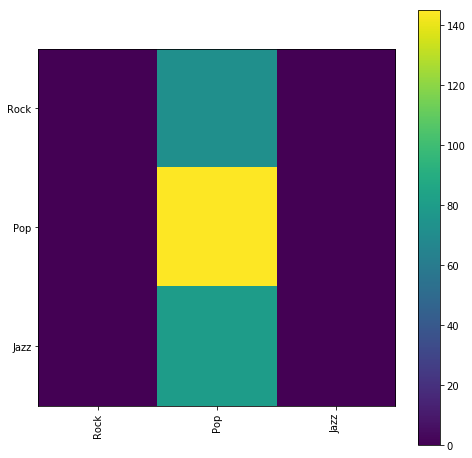

In [39]:
plt.figure(figsize=(8,8))
cnf_matrix = sklearn.metrics.confusion_matrix(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1))
classes = list(map_genre.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

<h1>VGG19

In [5]:
vgg19 = keras.applications.vgg19.VGG19(include_top=True, weights=None, input_tensor=None, input_shape=(90,50,3), pooling="max", classes=3)

In [6]:
pics, labels = [], []
i=0
for dir_path in glob.glob("0 to 30 seconds/Train/*"):
    for pic in glob.glob(os.path.join(dir_path,"*.png")):
        temp = cv2.imread(pic)
        temp = temp/255
        temp = cv2.resize(temp, (50, 90)) 
        pics.append(temp)
        labels.append(i)
    i=i+1 
x_train = np.array(pics)
y_train = np.array(labels)
y_train = keras.utils.to_categorical(y_train,num_classes)

In [7]:
pics , labels = [],[]
i=0
for dir_path in glob.glob("0 to 30 seconds/Test/*"):
    for pic in glob.glob(os.path.join(dir_path,"*.png")):
        temp = cv2.imread(pic)
        temp = temp/255
        temp = cv2.resize(temp, (50, 90)) 
        pics.append(temp)
        labels.append(i)
    i=i+1
x_test = np.array(pics)
y_test = np.array(labels)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [8]:
vgg19.compile(loss='categorical_crossentropy',
              optimizer=opt,
            metrics=['accuracy'])
vgg19.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test),callbacks = [csv_logger4])

Train on 701 samples, validate on 297 samples
Epoch 1/50
701/701 [==============================] - 15s 21ms/step - loss: 1.0945 - acc: 0.4351 - val_loss: 1.0838 - val_acc: 0.4882
Epoch 2/50
701/701 [==============================] - 3s 5ms/step - loss: 1.0764 - acc: 0.4879 - val_loss: 1.0656 - val_acc: 0.4882
Epoch 3/50
701/701 [==============================] - 3s 5ms/step - loss: 1.0604 - acc: 0.4879 - val_loss: 1.0526 - val_acc: 0.4882
Epoch 4/50
701/701 [==============================] - 3s 5ms/step - loss: 1.0494 - acc: 0.4879 - val_loss: 1.0477 - val_acc: 0.4882
Epoch 5/50
701/701 [==============================] - 3s 5ms/step - loss: 1.0480 - acc: 0.4879 - val_loss: 1.0469 - val_acc: 0.4882
Epoch 6/50
701/701 [==============================] - 3s 5ms/step - loss: 1.0471 - acc: 0.4879 - val_loss: 1.0472 - val_acc: 0.4882
Epoch 7/50
701/701 [==============================] - 3s 5ms/step - loss: 1.0472 - acc: 0.4879 - val_loss: 1.0472 - val_acc: 0.4882
Epoch 8/50
701/701 [========

In [9]:
vgg19.save('vgg19result0.h5')
vgg19.save_weights('vgg19_spectogram_0_weights.h5')

In [10]:
y_pred = vgg19.predict(x_test)

In [11]:
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_genre.values())), sep='')


             precision    recall  f1-score   support

       Rock       0.00      0.00      0.00        72
        Pop       0.49      1.00      0.66       145
       Jazz       0.00      0.00      0.00        80

avg / total       0.24      0.49      0.32       297



c:\users\gibra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


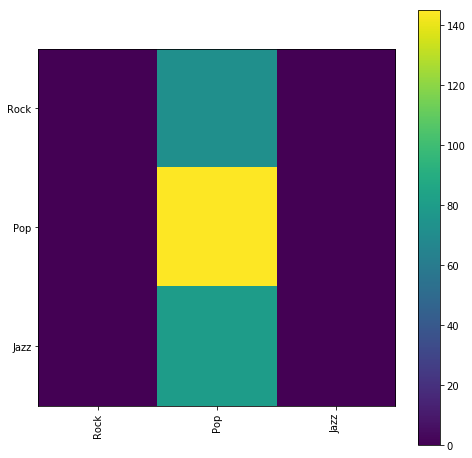

In [12]:
plt.figure(figsize=(8,8))
cnf_matrix = sklearn.metrics.confusion_matrix(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1))
classes = list(map_genre.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [13]:
pics, labels = [], []
i=0
for dir_path in glob.glob("30 to 60 seconds/Train/*"):
    for pic in glob.glob(os.path.join(dir_path,"*.png")):
        temp = cv2.imread(pic)
        temp = temp/255
        temp = cv2.resize(temp, (50, 90)) 
        pics.append(temp)
        labels.append(i)
    i=i+1 
x_train = np.array(pics)
y_train = np.array(labels)
y_train = keras.utils.to_categorical(y_train,num_classes)

In [14]:
pics , labels = [],[]
i=0
for dir_path in glob.glob("30 to 60 seconds/Test/*"):
    for pic in glob.glob(os.path.join(dir_path,"*.png")):
        temp = cv2.imread(pic)
        temp = temp/255
        temp = cv2.resize(temp, (50, 90)) 
        pics.append(temp)
        labels.append(i)
    i=i+1
x_test = np.array(pics)
y_test = np.array(labels)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [15]:
vgg19.compile(loss='categorical_crossentropy',
              optimizer=opt,
            metrics=['accuracy'])
vgg19.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test),callbacks = [csv_logger5])

Train on 701 samples, validate on 297 samples
Epoch 1/50
701/701 [==============================] - 5s 7ms/step - loss: 1.0468 - acc: 0.4879 - val_loss: 1.0468 - val_acc: 0.4882
Epoch 2/50
701/701 [==============================] - 3s 5ms/step - loss: 1.0469 - acc: 0.4879 - val_loss: 1.0468 - val_acc: 0.4882
Epoch 3/50
701/701 [==============================] - 3s 5ms/step - loss: 1.0468 - acc: 0.4879 - val_loss: 1.0468 - val_acc: 0.4882
Epoch 4/50
701/701 [==============================] - 3s 5ms/step - loss: 1.0468 - acc: 0.4879 - val_loss: 1.0469 - val_acc: 0.4882
Epoch 5/50
701/701 [==============================] - 3s 5ms/step - loss: 1.0469 - acc: 0.4879 - val_loss: 1.0469 - val_acc: 0.4882
Epoch 6/50
701/701 [==============================] - 3s 5ms/step - loss: 1.0473 - acc: 0.4879 - val_loss: 1.0470 - val_acc: 0.4882
Epoch 7/50
701/701 [==============================] - 3s 5ms/step - loss: 1.0469 - acc: 0.4879 - val_loss: 1.0469 - val_acc: 0.4882
Epoch 8/50
701/701 [==========

In [76]:
vgg19.save('vgg19result30.h5')
vgg19.save_weights('vgg19_spectogram_30_weights.h5')

In [77]:
y_pred = vgg19.predict(x_test)

In [78]:
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_genre.values())), sep='')


             precision    recall  f1-score   support

       Rock       0.00      0.00      0.00        72
        Pop       0.49      1.00      0.66       145
       Jazz       0.00      0.00      0.00        80

avg / total       0.24      0.49      0.32       297



C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


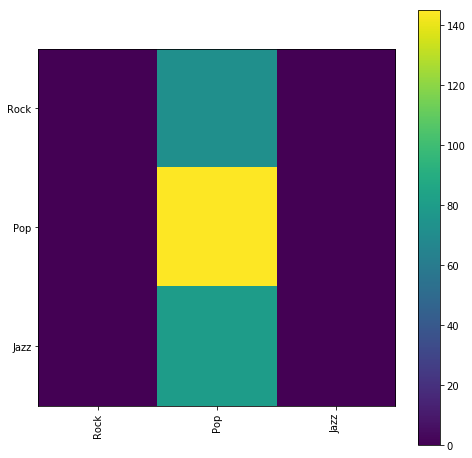

In [79]:
plt.figure(figsize=(8,8))
cnf_matrix = sklearn.metrics.confusion_matrix(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1))
classes = list(map_genre.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)